# Breast Cancer Classification

This notebook presents a complete machine learning workflow to classify breast cancer tumors as malignant or benign using the Breast Cancer Wisconsin dataset from sklearn.
We will explore the data, preprocess it, train several models, and evaluate their performance.



 ### Importing Required Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, classification_report, 
                           confusion_matrix, roc_curve)
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
# Load Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### Creating a DataFrame

In [3]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
df_cancer['target'] = cancer.target

# Preview the data
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df_cancer.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


### 📊 Exploratory Data Analysis (EDA)

#### Summary Statistics

In [5]:
df_cancer.describe

<bound method NDFrame.describe of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean c

#### Check for length

In [6]:
len(df_cancer)

569

#### Plot pairwise relationships in a dataset

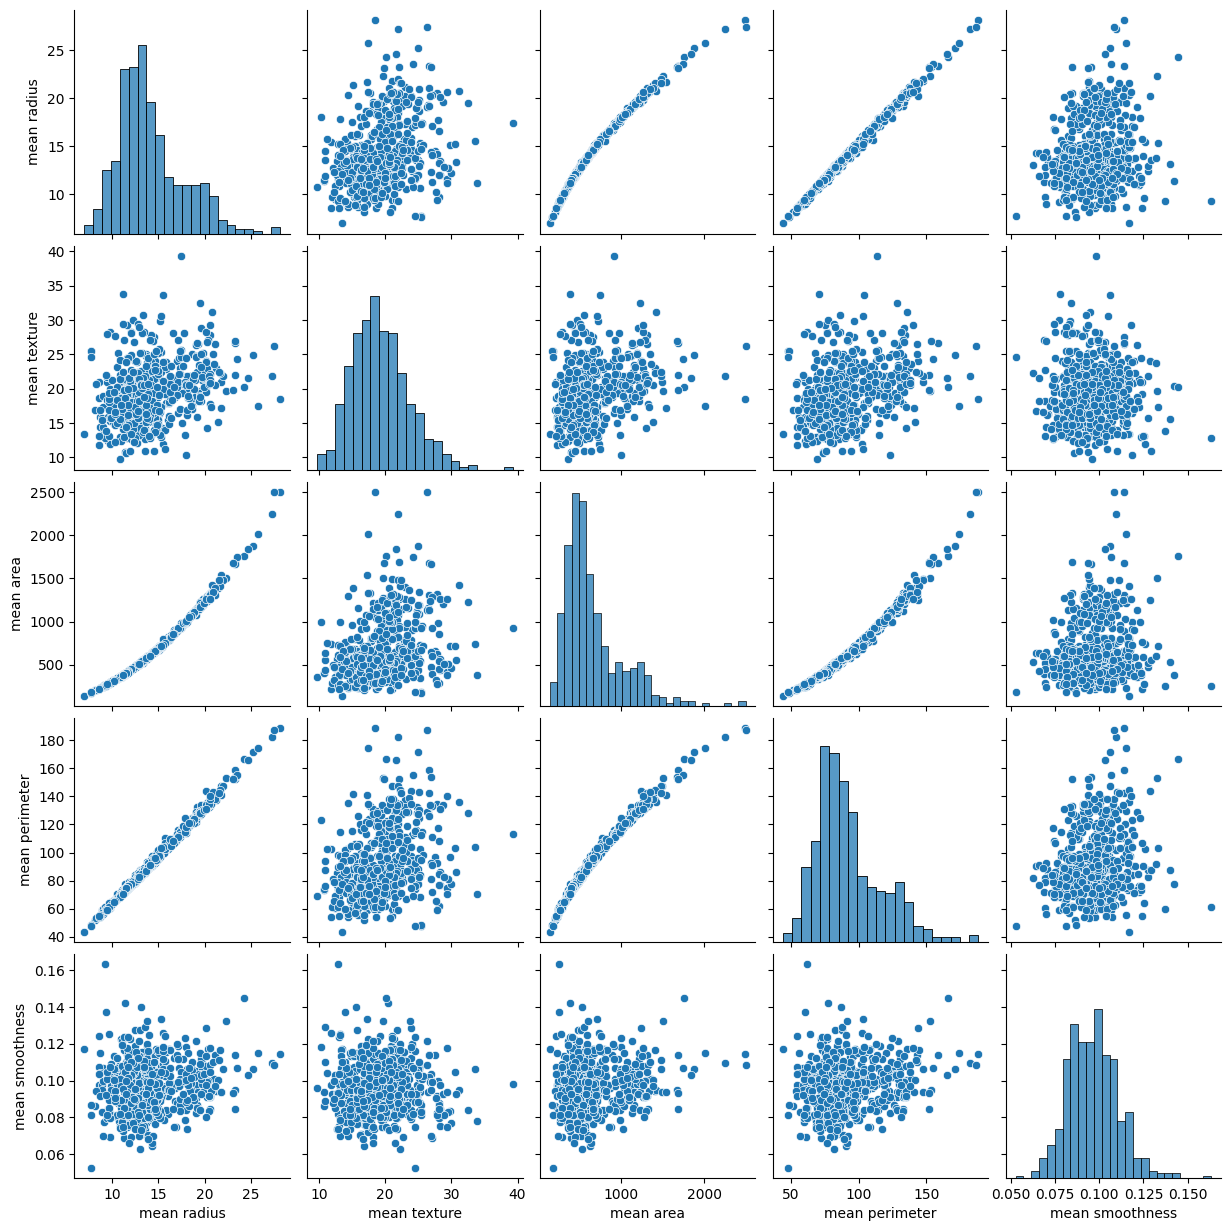

In [7]:
sns.pairplot(df_cancer,vars= ['mean radius','mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

But the only problem is that doesn't show the target class. It doesn't show actual which one of these samples is malignant or which one of them is benign.

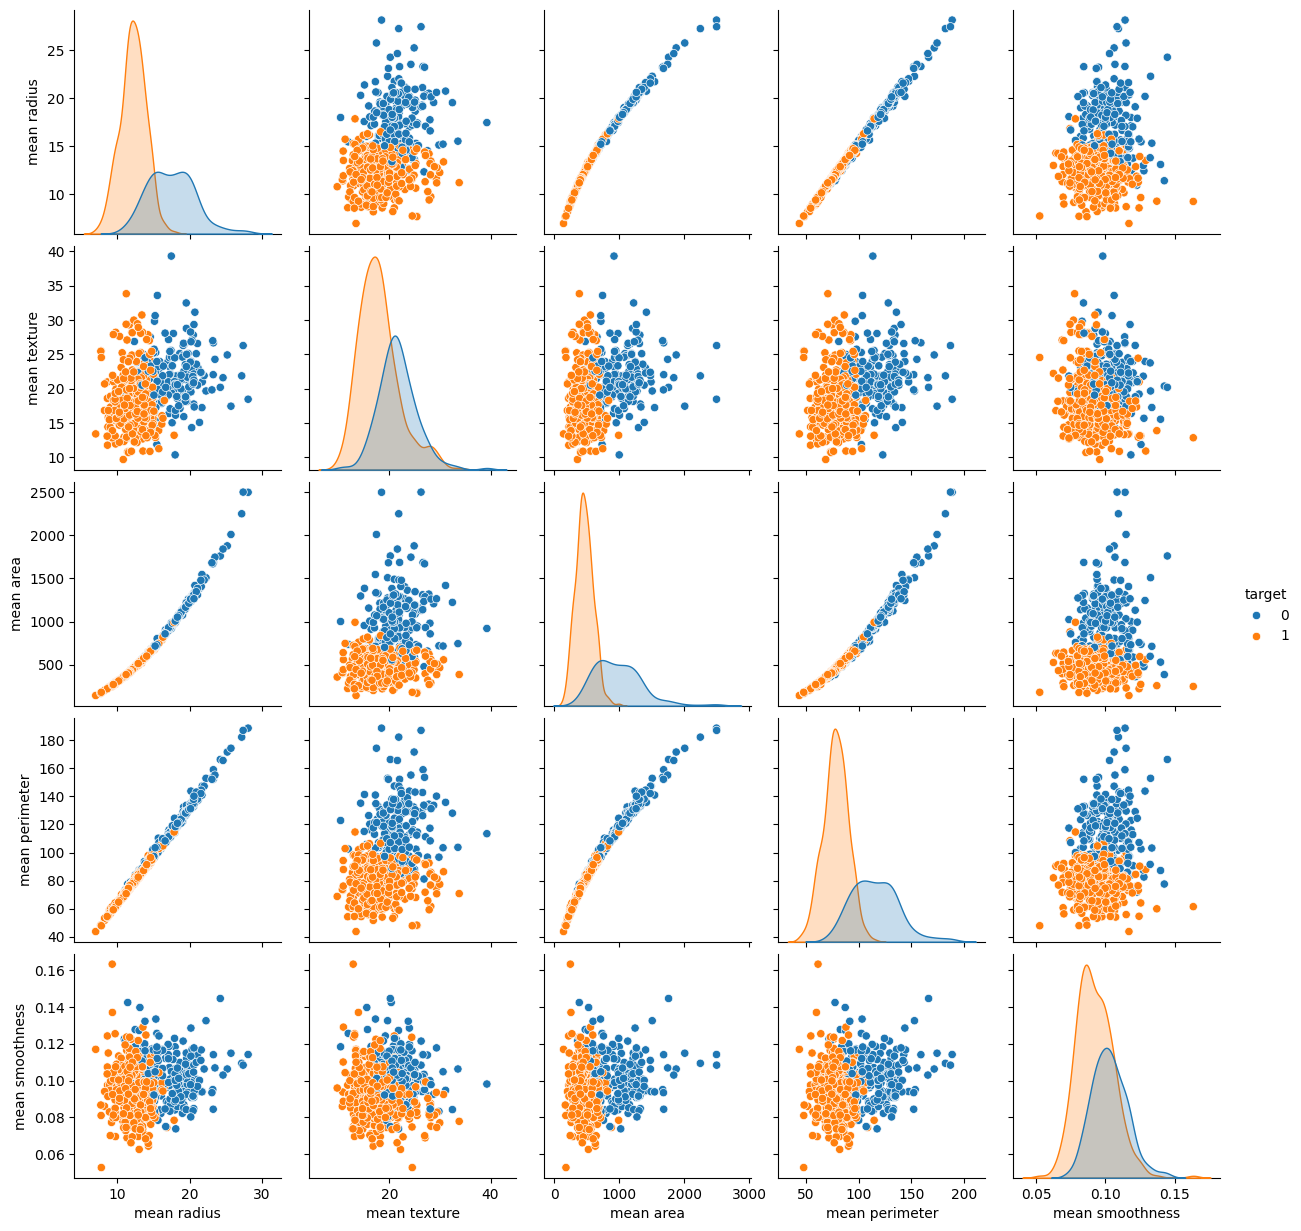

In [8]:
sns.pairplot(df_cancer,hue = 'target', vars= ['mean radius','mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

The blue points in here that's the malignant case. The orange points in here that's the benign case.

#### Target Distribution

<Axes: xlabel='target', ylabel='count'>

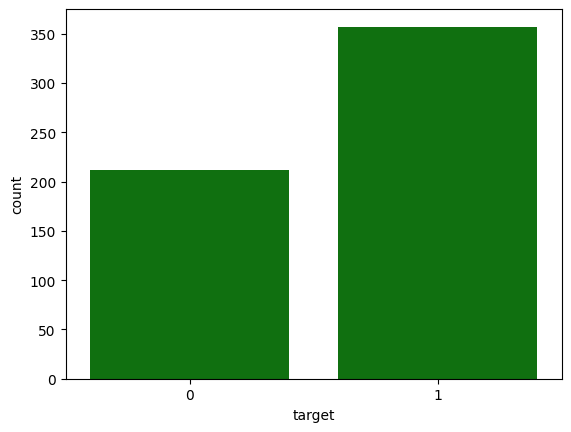

In [23]:
sns.countplot(x= 'target', data=df_cancer, color="green")

#### We take one of these slide graphs and see how can we play.

<Axes: xlabel='mean area', ylabel='mean smoothness'>

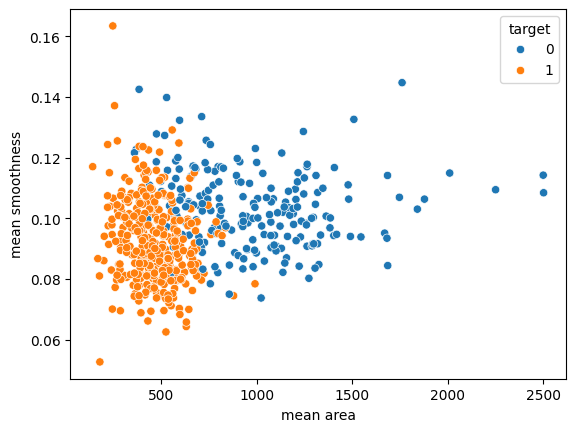

In [10]:
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=df_cancer)

#### Correlation Heatmap

<Axes: >

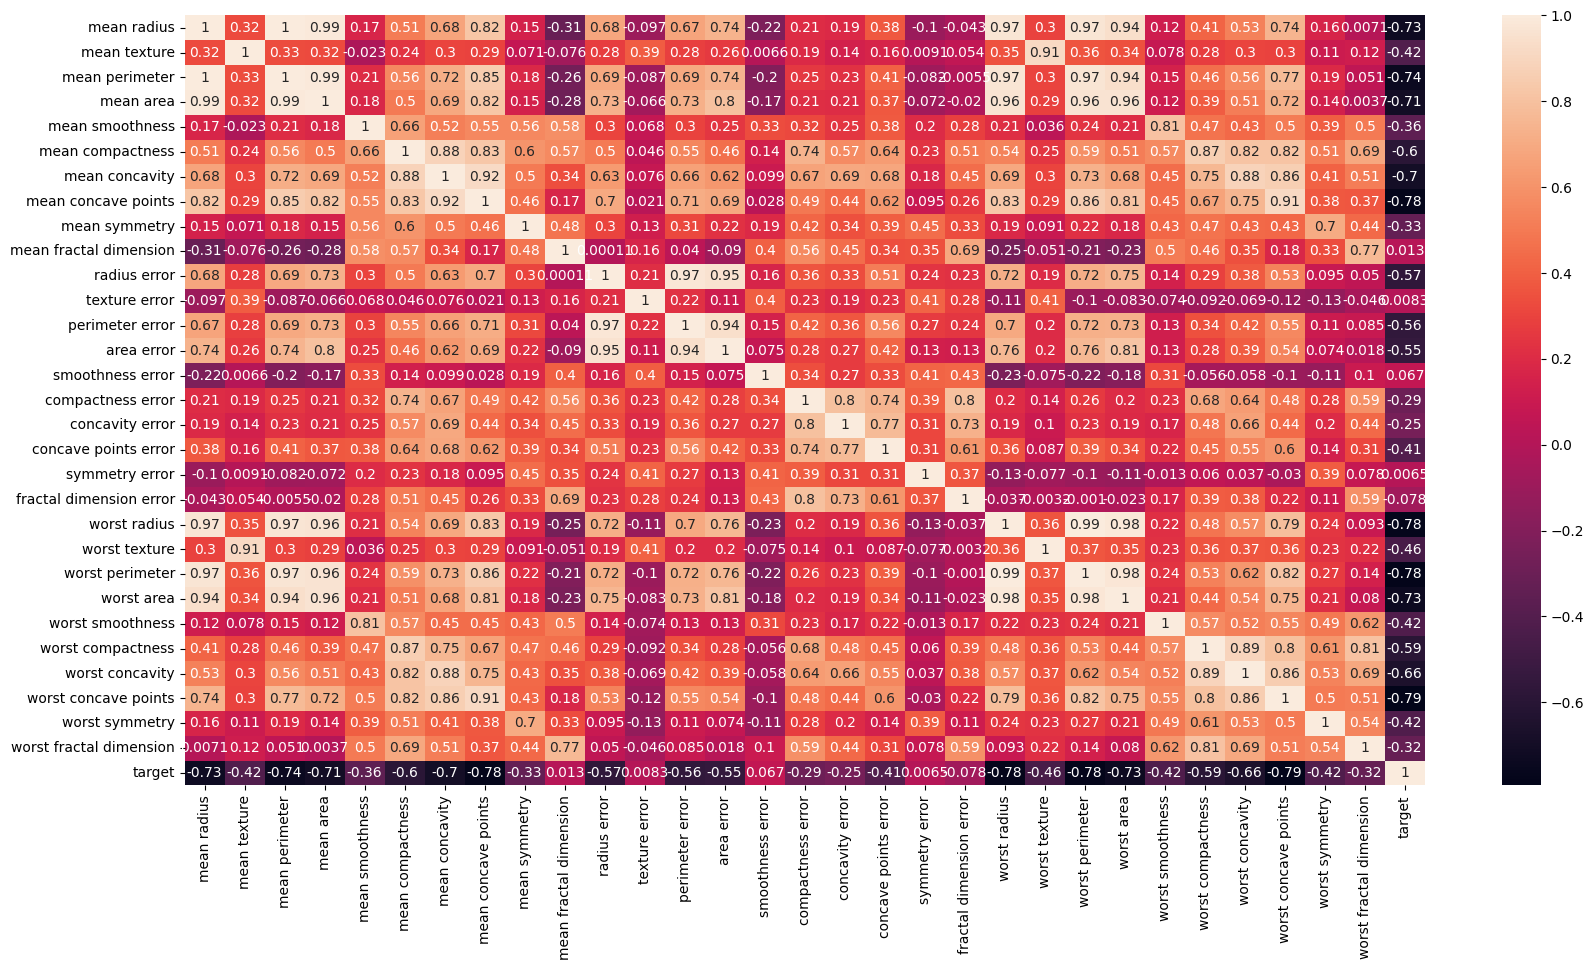

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(), annot=True)

### Feature Selection and Splitting Data

In [12]:
# Let's drop the target label coloumns
x = df_cancer.drop(['target'],axis=1)
# Preview the x columns data
x 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
# Predictor
y = df_cancer['target']
# Preview the y comumn data
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [14]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [15]:
# preview x_test
x_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
238,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


In [16]:
x_test.shape

(114, 30)

In [17]:
y_train

68     1
181    0
63     1
248    1
60     1
      ..
71     1
106    1
270    1
435    0
102    1
Name: target, Length: 455, dtype: int32

In [18]:
y_train.shape

(455,)

In [19]:
y_test

204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Name: target, Length: 114, dtype: int32

In [20]:
y_test.shape

(114,)

### Training and Evaluating Models

Training and evaluating models...

Training Logistic Regression...
Training Random Forest...
Training XGBoost...
Training SVM...

MODEL COMPARISON RESULTS
                     Accuracy  Precision  Recall  F1 Score  ROC AUC  \
Logistic Regression    0.9561     0.9459  0.9859    0.9655   0.9977   
Random Forest          0.9649     0.9589  0.9859    0.9722   0.9953   
XGBoost                0.9561     0.9583  0.9718    0.9650   0.9908   
SVM                    0.9474     0.9221  1.0000    0.9595   0.9934   

                     CV Accuracy  CV Std  
Logistic Regression       0.9495  0.0237  
Random Forest             0.9582  0.0176  
XGBoost                   0.9648  0.0146  
SVM                       0.9033  0.0370  

BEST PERFORMING MODELS BY METRIC
Accuracy       : Random Forest        (0.9649)
Precision      : Random Forest        (0.9589)
Recall         : SVM                  (1.0000)
F1 Score       : Random Forest        (0.9722)
ROC AUC        : Logistic Regression  (0.9977)


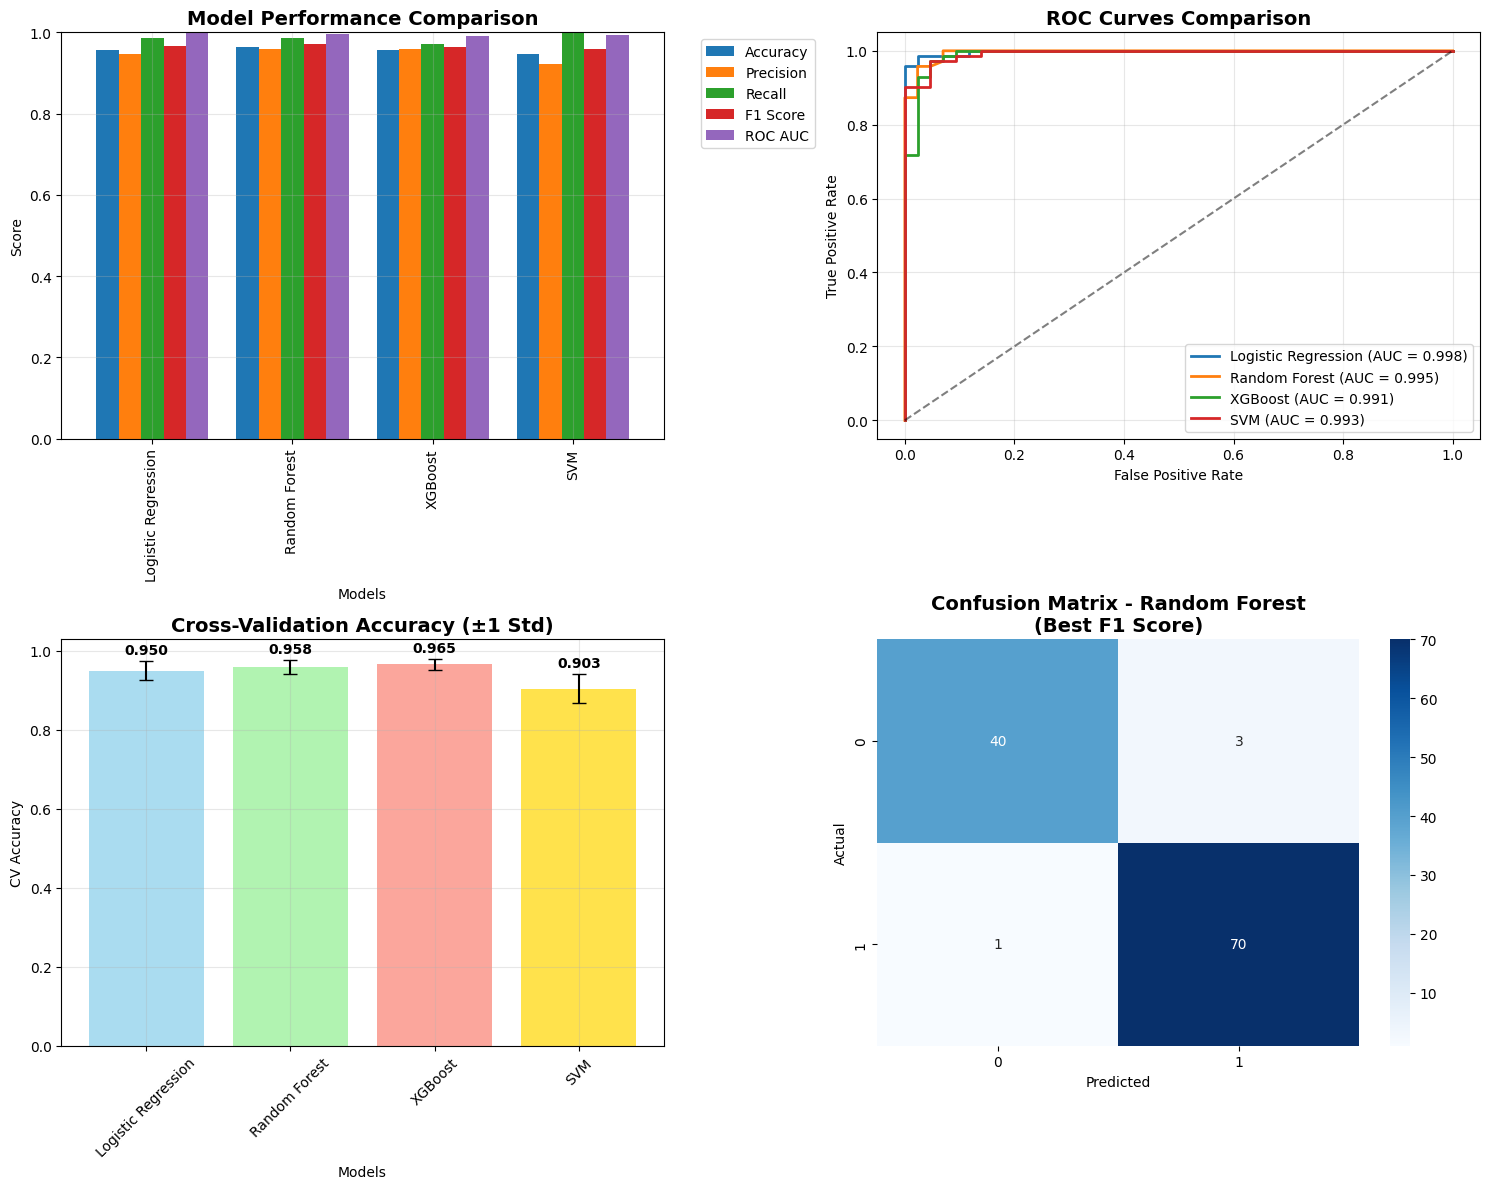


DETAILED CLASSIFICATION REPORT - Random Forest
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


OVERALL MODEL RANKING (by F1 Score)
1. Random Forest             (F1: 0.9722)
2. Logistic Regression       (F1: 0.9655)
3. XGBoost                   (F1: 0.9650)
4. SVM                       (F1: 0.9595)


In [21]:
# Define models with consistent random states for reproducibility
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                           random_state=42, verbosity=0),
    "SVM": SVC(probability=True, random_state=42)
}

# Initialize results storage
results = {}
probabilities = {}
predictions = {}

print("Training and evaluating models...\n")

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Make predictions
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)[:, 1]
    
    # Store predictions and probabilities for later use
    predictions[name] = preds
    probabilities[name] = probs
    
    # Calculate metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds),
        "ROC AUC": roc_auc_score(y_test, probs)
    }
    
    # Add cross-validation score for more robust evaluation
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    results[name]["CV Accuracy"] = cv_scores.mean()
    results[name]["CV Std"] = cv_scores.std()

# Create results DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("\n" + "="*80)
print("MODEL COMPARISON RESULTS")
print("="*80)
print(results_df)

# Find best model for each metric
print("\n" + "="*50)
print("BEST PERFORMING MODELS BY METRIC")
print("="*50)
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']:
    best_model = results_df[metric].idxmax()
    best_score = results_df.loc[best_model, metric]
    print(f"{metric:15}: {best_model:20} ({best_score:.4f})")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Performance Metrics Comparison
ax1 = axes[0, 0]
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
results_df[metrics_to_plot].plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax1.set_xlabel('Models')
ax1.set_ylabel('Score')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_ylim(0, 1)
ax1.grid(True, alpha=0.3)

# 2. ROC Curves
ax2 = axes[0, 1]
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, probabilities[name])
    auc_score = results_df.loc[name, 'ROC AUC']
    ax2.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

ax2.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Cross-Validation Accuracy with Error Bars
ax3 = axes[1, 0]
cv_means = results_df['CV Accuracy']
cv_stds = results_df['CV Std']
bars = ax3.bar(range(len(cv_means)), cv_means, yerr=cv_stds, 
               capsize=5, alpha=0.7, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
ax3.set_title('Cross-Validation Accuracy (±1 Std)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Models')
ax3.set_ylabel('CV Accuracy')
ax3.set_xticks(range(len(cv_means)))
ax3.set_xticklabels(cv_means.index, rotation=45)
ax3.grid(True, alpha=0.3)

# Add value labels on bars
for bar, mean, std in zip(bars, cv_means, cv_stds):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + std + 0.01,
             f'{mean:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Confusion Matrix for Best Model (by F1 Score)
best_f1_model = results_df['F1 Score'].idxmax()
ax4 = axes[1, 1]
cm = confusion_matrix(y_test, predictions[best_f1_model])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4)
ax4.set_title(f'Confusion Matrix - {best_f1_model}\n(Best F1 Score)', 
              fontsize=14, fontweight='bold')
ax4.set_xlabel('Predicted')
ax4.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Detailed classification report for best model
print(f"\n" + "="*60)
print(f"DETAILED CLASSIFICATION REPORT - {best_f1_model}")
print("="*60)
print(classification_report(y_test, predictions[best_f1_model]))

# Model ranking
print("\n" + "="*40)
print("OVERALL MODEL RANKING (by F1 Score)")
print("="*40)
ranking = results_df.sort_values('F1 Score', ascending=False)
for i, (model, row) in enumerate(ranking.iterrows(), 1):
    print(f"{i}. {model:25} (F1: {row['F1 Score']:.4f})")